In [1]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.shape

(10000, 14)

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total

In [5]:
df.duplicated().sum()

0

0

In [6]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

Exited
0    7963
1    2037
Name: count, dtype: int64

In [7]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [8]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [9]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [11]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [12]:
X=df.drop(columns=['Exited'])
y=df[['Exited']]

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [15]:
X_train_scaled

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [16]:
!pip install tensorflow

In [17]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential

In [18]:
from tensorflow.keras.layers import Dense

In [19]:
input_dim = 11
model = Sequential()
#layes add   3 nodes
model.add(Dense(11,activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [20]:
model.build(input_shape=(None, input_dim))

In [21]:
model.summary()

Model: "sequential"

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [23]:
history=model.fit(X_train_scaled,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7897 - loss: 0.5646 - val_accuracy: 0.7944 - val_loss: 0.4853
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7897 - loss: 0.5646 - val_accuracy: 0.7944 - val_loss: 0.4853
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7934 - loss: 0.4802 - val_accuracy: 0.8006 - val_loss: 0.4551
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7934 - loss: 0.4802 - val_accuracy: 0.8006 - val_loss: 0.4551
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8068 - loss: 0.4522 - val_accuracy: 0.8087 - val_loss: 0.4408
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8068 - loss: 0.4522 - val_accuracy: 0.8087 - val_loss: 0.4408
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8137 - loss: 0.4377 - val_accuracy: 0.8069 - val_loss: 0.4324
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8137 - loss: 0.4377 - val_a

In [24]:
model.layers[0].get_weights()

[array([[ 0.22726627, -0.55715925,  0.35055724, -0.49488145, -0.06097536,
          0.071814  ,  0.00805715, -0.43384555,  0.21575359, -0.12900504,
         -0.23139882],
        [ 0.40481395,  0.03329324,  0.23800728,  0.6188046 ,  0.16638689,
          0.2730196 , -1.0225987 , -0.50422245,  0.17033552, -0.8946669 ,
          0.5724045 ],
        [ 0.5192209 ,  0.0357994 ,  0.2302904 ,  0.4348914 ,  0.48113382,
          0.16078046, -0.23560579, -0.3255029 , -0.20175457, -0.02417049,
         -0.4790169 ],
        [ 0.11969324, -0.71083474, -0.67654014,  0.19596784,  0.47344288,
         -0.04661781, -0.37162235, -0.3125691 ,  0.09112811,  0.1938556 ,
          0.43379217],
        [-0.17090128, -0.22615479, -0.06844654,  0.1473704 ,  0.29910445,
         -0.7721577 ,  0.03055977, -0.80359155, -0.29573384, -0.1601483 ,
         -0.08126673],
        [-0.14096558,  0.15320379, -0.16822945,  0.29319122, -0.13672519,
          0.148147  ,  0.2678945 , -0.12056696, -0.31025207, -0.2407384

[array([[ 0.22726627, -0.55715925,  0.35055724, -0.49488145, -0.06097536,
          0.071814  ,  0.00805715, -0.43384555,  0.21575359, -0.12900504,
         -0.23139882],
        [ 0.40481395,  0.03329324,  0.23800728,  0.6188046 ,  0.16638689,
          0.2730196 , -1.0225987 , -0.50422245,  0.17033552, -0.8946669 ,
          0.5724045 ],
        [ 0.5192209 ,  0.0357994 ,  0.2302904 ,  0.4348914 ,  0.48113382,
          0.16078046, -0.23560579, -0.3255029 , -0.20175457, -0.02417049,
         -0.4790169 ],
        [ 0.11969324, -0.71083474, -0.67654014,  0.19596784,  0.47344288,
         -0.04661781, -0.37162235, -0.3125691 ,  0.09112811,  0.1938556 ,
          0.43379217],
        [-0.17090128, -0.22615479, -0.06844654,  0.1473704 ,  0.29910445,
         -0.7721577 ,  0.03055977, -0.80359155, -0.29573384, -0.1601483 ,
         -0.08126673],
        [-0.14096558,  0.15320379, -0.16822945,  0.29319122, -0.13672519,
          0.148147  ,  0.2678945 , -0.12056696, -0.31025207, -0.2407384

In [25]:
model.layers[1].get_weights()

[array([[ 0.36049184,  0.07633721,  0.0520746 ,  0.09603891,  0.3746972 ,
          0.08600244, -0.1329394 , -0.04749633, -0.26990288,  0.19884701,
          0.2966302 ],
        [ 0.12886354,  0.00225515,  0.29845455,  0.36797488,  0.46005479,
          0.44996366, -0.14523205,  0.23790069,  0.28600934,  0.2733324 ,
          0.42660365],
        [ 0.43399832,  0.289846  ,  0.35322896,  0.14923644, -0.37661827,
          0.21309532, -0.30153257,  0.35053387,  0.14960349,  0.28525683,
          0.3779373 ],
        [ 0.4811196 ,  0.62181103, -0.38113472, -0.4215884 , -0.04411083,
         -0.21938537, -0.3166199 ,  0.27207237, -0.18977922,  0.41868997,
          0.15266648],
        [-0.6484912 , -0.05530261,  0.12055477, -0.37579563, -0.35780796,
         -0.05872534,  0.13136624,  0.07738149,  0.20249204,  0.2292774 ,
          0.13379471],
        [-0.42755806, -0.2300318 , -0.6777803 ,  0.47986454, -0.00974807,
         -0.3862328 ,  0.3946023 , -0.5295022 , -0.36571074,  0.2063780

[array([[ 0.36049184,  0.07633721,  0.0520746 ,  0.09603891,  0.3746972 ,
          0.08600244, -0.1329394 , -0.04749633, -0.26990288,  0.19884701,
          0.2966302 ],
        [ 0.12886354,  0.00225515,  0.29845455,  0.36797488,  0.46005479,
          0.44996366, -0.14523205,  0.23790069,  0.28600934,  0.2733324 ,
          0.42660365],
        [ 0.43399832,  0.289846  ,  0.35322896,  0.14923644, -0.37661827,
          0.21309532, -0.30153257,  0.35053387,  0.14960349,  0.28525683,
          0.3779373 ],
        [ 0.4811196 ,  0.62181103, -0.38113472, -0.4215884 , -0.04411083,
         -0.21938537, -0.3166199 ,  0.27207237, -0.18977922,  0.41868997,
          0.15266648],
        [-0.6484912 , -0.05530261,  0.12055477, -0.37579563, -0.35780796,
         -0.05872534,  0.13136624,  0.07738149,  0.20249204,  0.2292774 ,
          0.13379471],
        [-0.42755806, -0.2300318 , -0.6777803 ,  0.47986454, -0.00974807,
         -0.3862328 ,  0.3946023 , -0.5295022 , -0.36571074,  0.2063780

In [26]:
y_log=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [27]:
y_pred=np.where(y_log>0.5,1,0)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.841

0.841

In [29]:
#Some nureal Network changes output increase
#hidden layers nodes increase
#epochs increase
#hidden layes activation function(Relu)
#layers number of nodes increase

In [30]:
history = model.fit(X, y, epochs=10, batch_size=32,validation_split=0.2)

Epoch 1/10
Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6916 - loss: 842.6039 - val_accuracy: 0.6640 - val_loss: 69.1626
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6916 - loss: 842.6039 - val_accuracy: 0.6640 - val_loss: 69.1626
Epoch 2/10
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6781 - loss: 153.3892 - val_accuracy: 0.8050 - val_loss: 71.9840
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6781 - loss: 153.3892 - val_accuracy: 0.8050 - val_loss: 71.9840
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6927 - loss: 71.7693 - val_accuracy: 0.5175 - val_loss: 174.6231
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6927 - loss: 71.7693 - val_accuracy: 0.5175 - val_loss: 174.6231
Epoch 4/10
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6918 - loss: 80.2354 - val_accuracy: 0.8000 - val_loss: 72.5234
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6918 - loss: 80.23

In [31]:
history.history

{'accuracy': [0.6863750219345093,
  0.6812499761581421,
  0.6899999976158142,
  0.6918749809265137,
  0.6800000071525574,
  0.6832500100135803,
  0.6861249804496765,
  0.6821249723434448,
  0.6794999837875366,
  0.6880000233650208],
 'loss': [381.5439453125,
  127.45796966552734,
  73.64611053466797,
  67.80086517333984,
  79.59153747558594,
  56.77217102050781,
  52.406394958496094,
  54.05097961425781,
  64.5150146484375,
  49.81821823120117],
 'val_accuracy': [0.6639999747276306,
  0.8050000071525574,
  0.5174999833106995,
  0.800000011920929,
  0.6334999799728394,
  0.7480000257492065,
  0.7014999985694885,
  0.8019999861717224,
  0.656499981880188,
  0.7975000143051147],
 'val_loss': [69.1626205444336,
  71.98401641845703,
  174.62307739257812,
  72.52339172363281,
  66.27841186523438,
  36.6114501953125,
  37.946659088134766,
  133.13824462890625,
  53.16795349121094,
  62.68686294555664]}

{'accuracy': [0.6863750219345093,
  0.6812499761581421,
  0.6899999976158142,
  0.6918749809265137,
  0.6800000071525574,
  0.6832500100135803,
  0.6861249804496765,
  0.6821249723434448,
  0.6794999837875366,
  0.6880000233650208],
 'loss': [381.5439453125,
  127.45796966552734,
  73.64611053466797,
  67.80086517333984,
  79.59153747558594,
  56.77217102050781,
  52.406394958496094,
  54.05097961425781,
  64.5150146484375,
  49.81821823120117],
 'val_accuracy': [0.6639999747276306,
  0.8050000071525574,
  0.5174999833106995,
  0.800000011920929,
  0.6334999799728394,
  0.7480000257492065,
  0.7014999985694885,
  0.8019999861717224,
  0.656499981880188,
  0.7975000143051147],
 'val_loss': [69.1626205444336,
  71.98401641845703,
  174.62307739257812,
  72.52339172363281,
  66.27841186523438,
  36.6114501953125,
  37.946659088134766,
  133.13824462890625,
  53.16795349121094,
  62.68686294555664]}

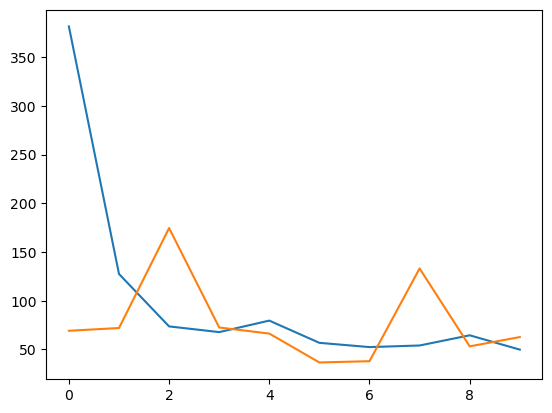

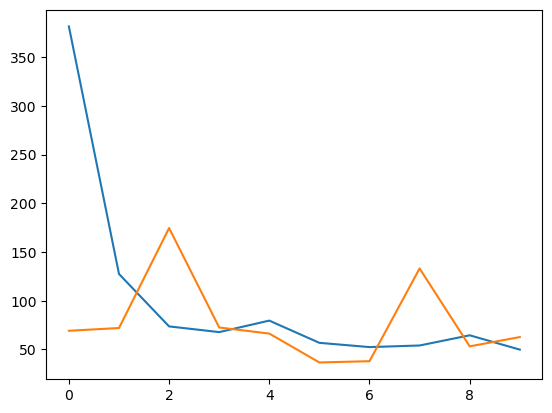

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

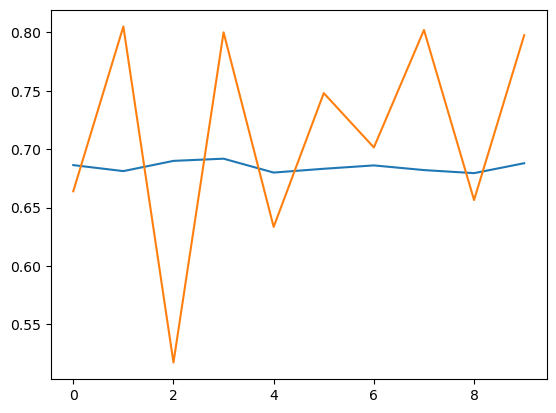

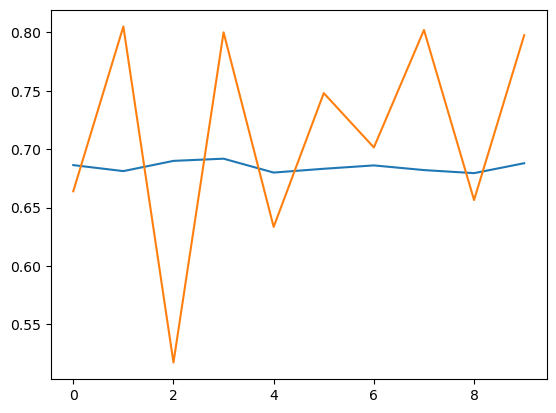

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

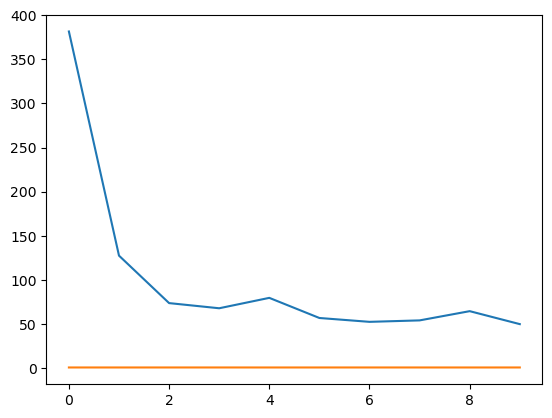

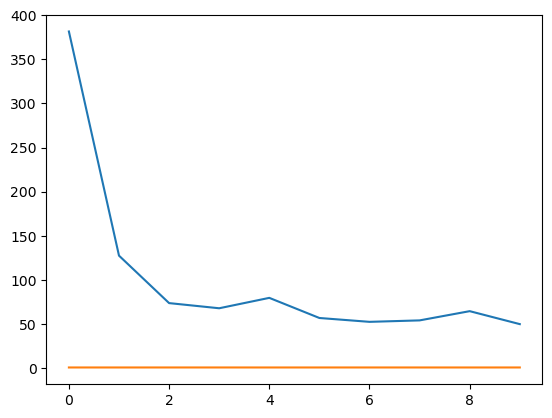

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])

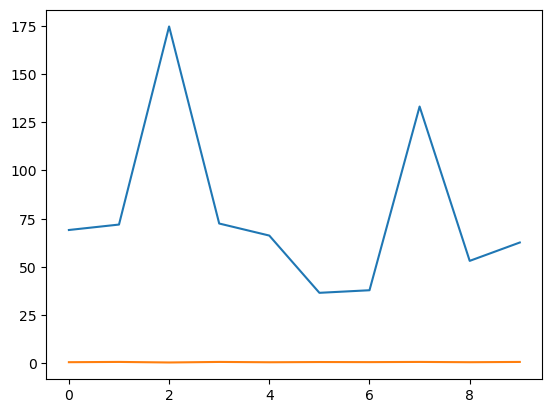

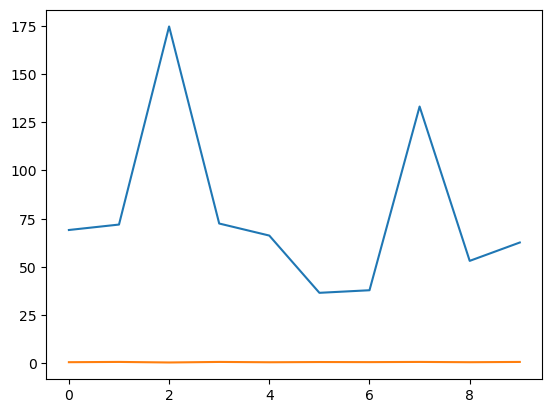

In [35]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])

# THE END